In [1]:
! wget -N http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

--2018-06-05 08:17:39--  http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘archive.ics.uci.edu’


# Abalone

<img src='https://cdn.shopify.com/s/files/1/2086/1263/products/1d89434927bffb6fd1786c19c2d921fb_2000x.jpg?v=1522240385' width='500px'/>

Abalone vary in size from 20 mm (0.79 in) (Haliotis pulcherrima) to 200 mm (7.9 in) while Haliotis rufescens is the largest of the genus at 12 in (30 cm).

The shell of abalones is convex, rounded to oval in shape, and may be highly arched or very flattened. The shell of the majority of species has a small, flat spire and two to three whorls. The last whorl, known as the body whorl, is auriform, meaning that the shell resembles an ear, giving rise to the common name "ear shell". Haliotis asinina has a somewhat different shape, as it is more elongated and distended. The shell of Haliotis cracherodii cracherodii is also unusual as it has an ovate form, is imperforate, shows an exserted spire, and has prickly ribs.

A mantle cleft in the shell impresses a groove in the shell, in which are the row of holes characteristic of the genus. These holes are respiratory apertures for venting water from the gills and for releasing sperm and eggs into the water column. They make up what is known as the selenizone which forms as the shell grows. This series of eight to 38 holes is near the anterior margin. Only a small number is generally open. The older holes are gradually sealed up as the shell grows and new holes form. Each species has a typical number of open holes, between four and 10, in the selenizone. An abalone has no operculum. The aperture of the shell is very wide and nacreous.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('abalone.data', names=['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Now let's convert categorical feature 'Sex' to numerical via **one-hot encoding**

In [4]:
data = pd.get_dummies(data)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


## Analysis

In [5]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,-0.518552,0.215459
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
Sex_F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
Sex_I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


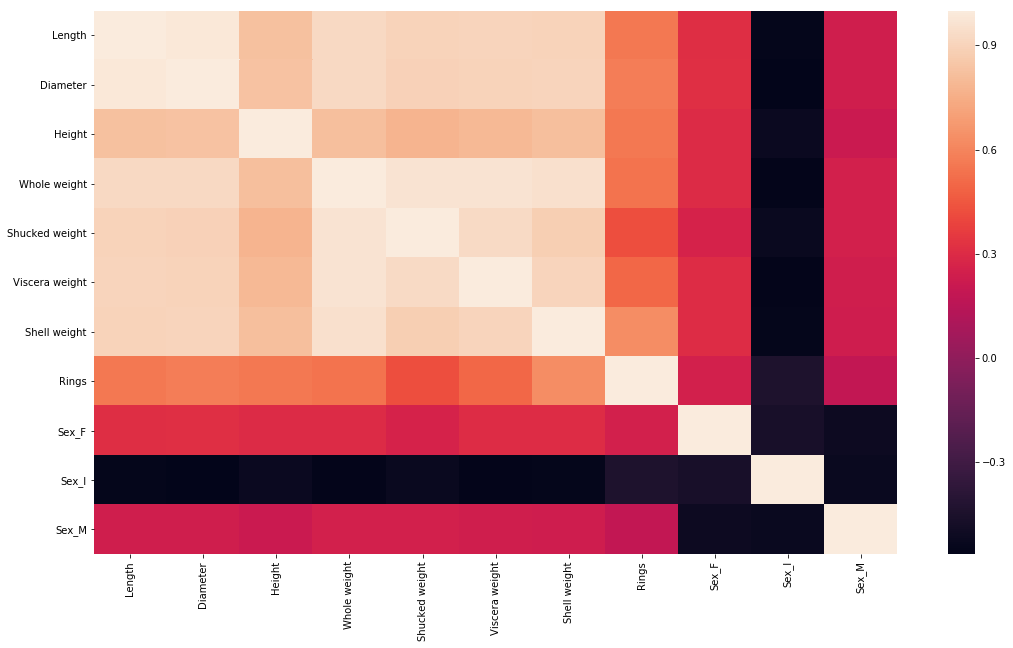

In [6]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(18,10)) 
sns.heatmap(corr)
corr

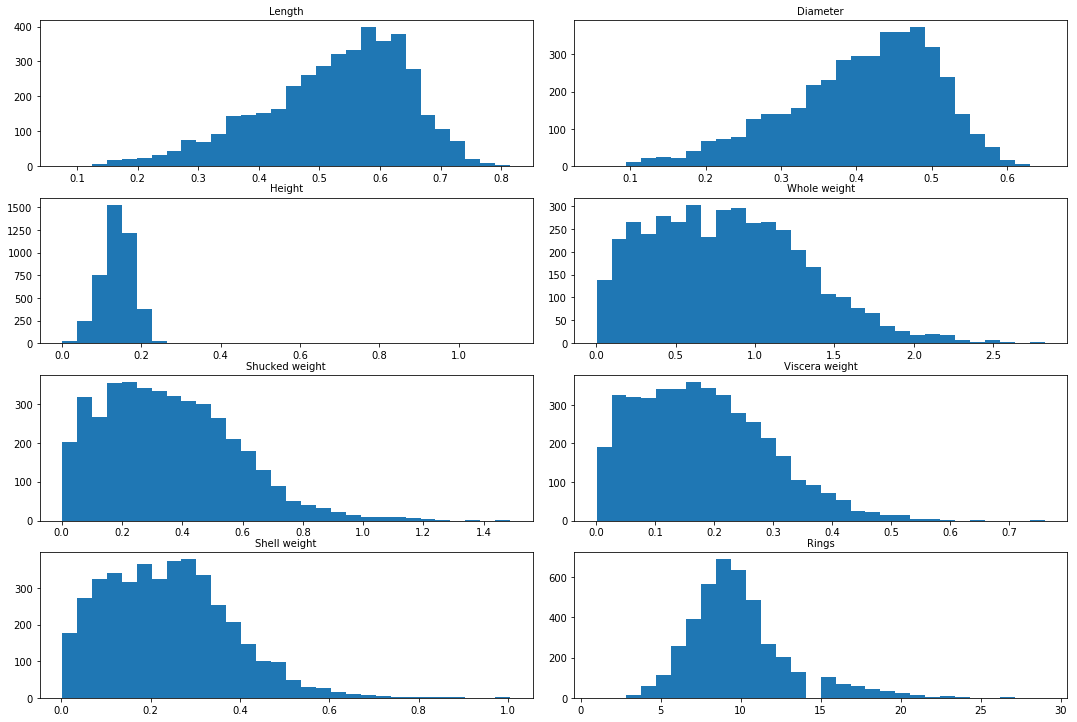

In [7]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7,ax8)) = plt.subplots(4, 2, figsize = (15,10), sharex=False)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
plt.tight_layout()
for n in range(0, 8):
    axs[n].hist(data[data.columns[n]], bins=30)
    axs[n].set_title(data.columns[n], fontsize=10)

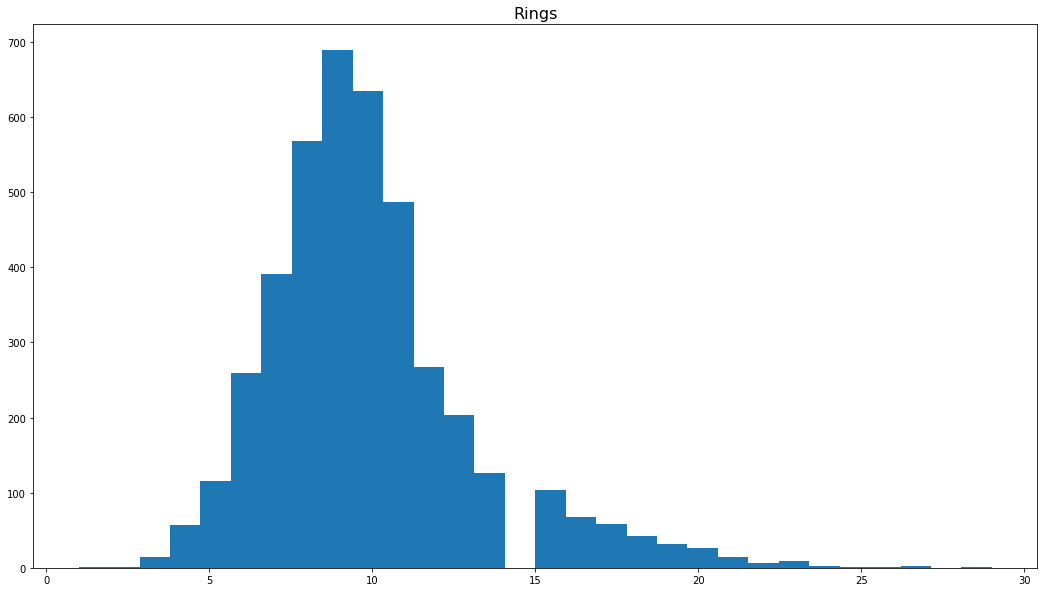

In [8]:
plt.figure(figsize=(18, 10))
plt.hist(data['Rings'], bins=30)
plt.title("Rings", fontsize=16)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Rings']), data['Rings'], test_size=.2, random_state=17)
sc = StandardScaler().fit(X_train)
X_train, X_test = sc.transform(X_train), sc.transform(X_test)

# Classification

In [29]:
def approx(y_pred, y_true):
    predictions = list(zip(y_pred, y_true))
    return [len(list(filter(lambda a: abs(a[0] - a[1]) <= d, predictions))) / len(predictions) for d in [0.5, 1, 2]]

def score(model):
    model.fit(X_train, y_train)
    print('Train score: {}'.format(approx(model.predict(X_train), y_train)))
    print('Test score: {}'.format(approx(model.predict(X_test), y_test)))
    
def grid_search(model, params):
    gs = GridSearchCV(model, params)
    return gs.fit(X_train, y_train)

## K-Neighbors

In [11]:
score(KNeighborsClassifier(29))

Train score: [0.3214606405267884, 0.6596827297216402, 0.7955701885662975]
Test score: [0.2619617224880383, 0.6363636363636364, 0.7990430622009569]


## SVM + linear kernel

In [12]:
score(SVC(kernel='linear'))

Train score: [0.27357078718946426, 0.6381322957198443, 0.7898832684824902]
Test score: [0.25478468899521534, 0.6411483253588517, 0.7858851674641149]


## Decision tree

Train score: [0.31188266985932356, 0.6390302304699191, 0.8054474708171206]
Test score: [0.24162679425837322, 0.6267942583732058, 0.7966507177033493]


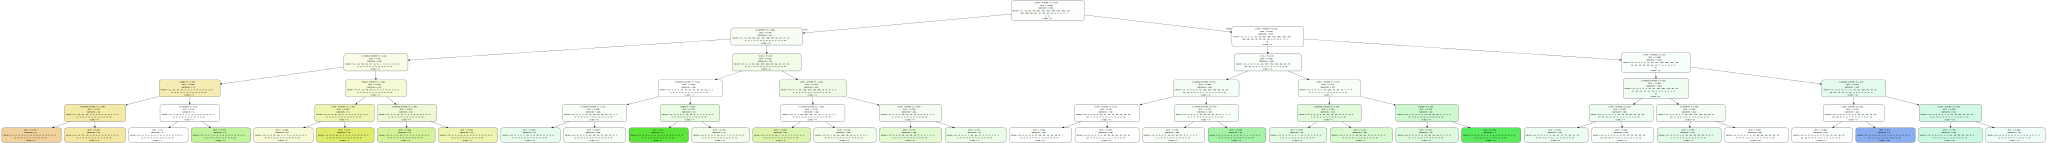

In [13]:
import graphviz
from sklearn.tree import export_graphviz
dt = DecisionTreeClassifier(max_depth=5)
score(dt)
dot_data = export_graphviz(dt, out_file=None, 
                         feature_names=data.drop(columns=['Rings']).columns, 
                         class_names=[str(i + 1) for i in range(29)],
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Random forest

In [14]:
score(RandomForestClassifier(max_depth=4, n_estimators=83, max_features=1))

Train score: [0.29841364860820113, 0.6438192158036516, 0.7832984136486082]
Test score: [0.27751196172248804, 0.6435406698564593, 0.7834928229665071]


## Multi-layer perceptron

In [15]:
score(MLPClassifier(alpha=2))

Train score: [0.2837473810236456, 0.6569889254714157, 0.8021550434001796]
Test score: [0.26674641148325356, 0.6686602870813397, 0.8086124401913876]


## AdaBoost

In [16]:
score(AdaBoostClassifier())

Train score: [0.21430709368452558, 0.5501346902125113, 0.7306195749775516]
Test score: [0.23205741626794257, 0.569377990430622, 0.7296650717703349]


# Regression

In [17]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

## Linear regression

In [18]:
score(LinearRegression())

Train score: [0.23585752768632146, 0.43998802753666566, 0.7357078718946424]
Test score: [0.23205741626794257, 0.4258373205741627, 0.7165071770334929]


## SVM + RBF kernel

In [19]:
score(SVR(C=250, gamma=0.01))

Train score: [0.2927267285243939, 0.5175097276264592, 0.7803052978150254]
Test score: [0.27392344497607657, 0.49401913875598086, 0.7763157894736842]


## SVM + polynomial kernel

In [20]:
score(SVR(kernel='poly', C=100, degree=4))

Train score: [0.3163723436096977, 0.5474408859622868, 0.7880873989823406]
Test score: [0.25239234449760767, 0.4880382775119617, 0.757177033492823]


## Decision tree

In [21]:
score(DecisionTreeRegressor(max_depth=6, criterion="mse", min_samples_leaf=20))

Train score: [0.26578868602214906, 0.4890751272074229, 0.7692307692307693]
Test score: [0.23205741626794257, 0.45454545454545453, 0.7332535885167464]


## Multi-layer perceptron

In [22]:
score(MLPRegressor(alpha=1e-2))

Train score: [0.2529182879377432, 0.4681233163723436, 0.7482789583956899]
Test score: [0.2583732057416268, 0.465311004784689, 0.7332535885167464]


# TensorFlow

In [23]:
import urllib
import tempfile

import tensorflow as tf

In [24]:
FLAGS = None
LEARNING_RATE = 0.001

tf.logging.set_verbosity(tf.logging.INFO)

In [25]:
def maybe_download(train_data=None, test_data=None, predict_data=None):
    """Maybe downloads training data and returns train and test file names."""
    if train_data:
        train_file_name = train_data
    else:
        train_file = tempfile.NamedTemporaryFile(delete=False)
        urllib.request.urlretrieve(
            "http://download.tensorflow.org/data/abalone_train.csv",
            train_file.name)
        train_file_name = train_file.name
        train_file.close()
        print("Training data is downloaded to %s" % train_file_name)
    
    if test_data:
        test_file_name = test_data
    else:
        test_file = tempfile.NamedTemporaryFile(delete=False)
        urllib.request.urlretrieve(
            "http://download.tensorflow.org/data/abalone_test.csv", test_file.name)
        test_file_name = test_file.name
        test_file.close()
        print("Test data is downloaded to %s" % test_file_name)
        
    if predict_data:
        predict_file_name = predict_data
    else:
        predict_file = tempfile.NamedTemporaryFile(delete=False)
        urllib.request.urlretrieve(
            "http://download.tensorflow.org/data/abalone_predict.csv",
            predict_file.name)
        predict_file_name = predict_file.name
        predict_file.close()
        print("Prediction data is downloaded to %s" % predict_file_name)

    return train_file_name, test_file_name, predict_file_name

In [26]:
def model_fn(features, labels, mode, params):

    first_hidden_layer = tf.layers.dense(features["x"], 10, activation=tf.nn.relu)

    second_hidden_layer = tf.layers.dense(
      first_hidden_layer, 10, activation=tf.nn.relu)

    output_layer = tf.layers.dense(second_hidden_layer, 1)

    predictions = tf.reshape(output_layer, [-1])

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode=mode,
            predictions={"ages": predictions})

    loss = tf.losses.mean_squared_error(labels, predictions)

    optimizer = tf.train.GradientDescentOptimizer(
      learning_rate=params["learning_rate"])
    train_op = optimizer.minimize(
      loss=loss, global_step=tf.train.get_global_step())

    eval_metric_ops = {
      "rmse": tf.metrics.root_mean_squared_error(
          tf.cast(labels, tf.float64), predictions)
    }

    return tf.estimator.EstimatorSpec(
      mode=mode,
      loss=loss,
      train_op=train_op,
      eval_metric_ops=eval_metric_ops)

In [27]:
abalone_train, abalone_test, abalone_predict = maybe_download()

training_set = tf.contrib.learn.datasets.base.load_csv_without_header(
  filename=abalone_train, target_dtype=np.int, features_dtype=np.float64)

test_set = tf.contrib.learn.datasets.base.load_csv_without_header(
  filename=abalone_test, target_dtype=np.int, features_dtype=np.float64)

prediction_set = tf.contrib.learn.datasets.base.load_csv_without_header(
  filename=abalone_predict, target_dtype=np.int, features_dtype=np.float64)

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [ ]:
model_params = {"learning_rate": LEARNING_RATE}

nn = tf.estimator.Estimator(model_fn=model_fn, params=model_params)

train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": np.array(training_set.data)},
    y=np.array(training_set.target),
    num_epochs=None,
    shuffle=True)

nn.train(input_fn=train_input_fn, steps=5000)

test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": np.array(test_set.data)},
    y=np.array(test_set.target),
    num_epochs=1,
    shuffle=False)

ev = nn.evaluate(input_fn=test_input_fn)
print("Loss: %s" % ev["loss"])
print("Root Mean Squared Error: %s" % ev["rmse"])

predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": prediction_set.data},
    num_epochs=1,
    shuffle=False)
predictions = nn.predict(input_fn=predict_input_fn)
for i, p in enumerate(predictions):
    print("Prediction %s: %s" % (i + 1, p["ages"]))

In [ ]:
t_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": test_set.data},
    num_epochs=1,
    shuffle=False)
t_pred = nn.predict(input_fn=t_fn)
t_pred = list(map(lambda x: x['ages'], t_pred))

approx(t_pred, test_set.target)